In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
alpha_e = alpha_r = 0.05

In [21]:
test = pd.read_csv('csvs/test_df.csv')

In [3]:
train = pd.read_csv('csvs/train_df.csv')
train

,SPEED,temp,feelslike,dew,humidity,precip,snowdepth,windgust,sealevelpressure,cloudcover,...,weekday,time_of_day,lat,long,is_clear,is_overcast,is_partcloud,is_rainovercase,is_snowovercast,is_snowrainovercast
0,-0.097425,-0.311686,-0.601803,1.236867,1.772740,0.208233,-0.487712,2.166574,-0.945962,0.985867,...,1.130969,0.086678,1.299857,-0.800659,-0.373913,-0.555390,-1.083229,3.795125,-0.029255,-0.193054
1,-0.485486,-0.869649,-0.352587,0.619582,1.811826,7.298491,0.166610,-0.578720,-0.273852,0.985867,...,0.116954,1.529717,-1.076051,0.613789,-0.373913,-0.555390,-1.083229,-0.263496,-0.029255,5.179891
2,-1.261608,0.093287,0.081762,1.278717,1.135737,-0.196925,-0.487712,0.662503,-1.341320,0.954776,...,0.623961,0.496829,0.725115,0.120002,-0.373913,1.800537,-1.083229,-0.263496,-0.029255,-0.193054
3,-0.744193,1.218212,1.299363,2.094789,0.567134,-0.196925,-0.487712,-0.841568,-0.036636,0.674955,...,-0.897061,-0.403550,0.354572,-1.209129,-0.373913,-0.555390,0.923166,-0.263496,-0.029255,-0.193054
4,1.584171,-0.293687,-0.338346,1.226405,1.720161,-0.196925,-0.487712,-0.286668,-1.433571,0.985867,...,-0.897061,-1.085484,-0.356252,-0.827597,-0.373913,1.800537,-1.083229,-0.263496,-0.029255,-0.193054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960831,-1.002901,-0.221692,-0.167454,-1.410135,-1.123319,-0.196925,-0.487712,0.297438,0.134686,0.649516,...,-1.404069,0.006101,0.637449,0.313309,-0.373913,-0.555390,0.923166,-0.263496,-0.029255,-0.193054
1960832,1.972232,-0.806653,-0.658767,-0.259264,0.452669,-0.196925,-0.487712,-1.557096,-0.366102,-1.665368,...,-0.897061,1.720424,1.619428,-0.199779,2.674418,-0.555390,-1.083229,-0.263496,-0.029255,-0.193054
1960833,0.419989,0.120285,0.039039,0.975306,0.697420,-0.196925,-0.487712,1.246609,-1.090926,-0.741110,...,0.623961,-0.892961,0.887346,-2.311945,-0.373913,-0.555390,0.923166,-0.263496,-0.029255,-0.193054
1960834,0.678696,-0.059703,0.003437,-0.311577,-0.432806,-0.196925,-0.487712,-1.294249,1.716121,-1.840610,...,0.116954,1.476468,-1.562620,0.018856,2.674418,-0.555390,-1.083229,-0.263496,-0.029255,-0.193054


Forward Stepwise Regression

In [14]:
train.columns

Index(['SPEED', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'snowdepth',
       'windgust', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'weekday', 'time_of_day',
       'lat', 'long', 'is_clear', 'is_overcast', 'is_partcloud',
       'is_rainovercase', 'is_snowovercast', 'is_snowrainovercast'],
      dtype='object')

In [4]:
train_df_X = train.drop(["SPEED"],axis=1)

In [5]:
Y = train["SPEED"].tolist()

In [30]:
in_model = [] #variables in our model
out_model = train_df_X.columns.tolist() #variables not in (outside) our model
#print(out_model)

#Initialization: find which value to begin with
print("Initialization phase: we first find the predictor with lowest p-value and insert into our model")
lowest_p = 1
new_param = ''
for i in out_model:
    #print(i)
    X = train_df_X[[i]]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    if(model.pvalues[i] < lowest_p):
        lowest_p = model.pvalues[i]
        new_param = i
    #print(model.pvalues[i])
  #print(new_param, lowest_p)

in_model = [new_param]
out_model.remove(new_param)

print("We now begin forward stepwise regression")
while(True):
    print("current predictors being used:", in_model)
    #print(in_model)
    #print(out_model)

    #print("Forward step")
    #Forward step
    lowest_p = 1
    new_param = ''
    for i in out_model:
        #print("Considering entering variable ", i)
        X = train_df_X[in_model + [i]]
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()
        #print(model.summary())
        #print("p-value of variable", i, "is", model.pvalues[i])
        if(model.pvalues[i] < lowest_p):
            lowest_p = model.pvalues[i]
            new_param = i
    print("Lowest p value found is from variable", new_param, "with value", lowest_p)
    if(lowest_p < alpha_e):
        print("this is lower than alpha_e=", alpha_e, "so we add it to our model")
        in_model.append(new_param)
        out_model.remove(new_param)
    else:
        print("This is higher than alpha_e=", alpha_e, "so we terminate procedure here")
        break

print("Final set of predictors being used:", in_model)

Initialization phase: we first find the predictor with lowest p-value and insert into our model
We now begin forward stepwise regression
current predictors being used: ['temp']
Lowest p value found is from variable feelslike with value 0.0
this is lower than alpha_e= 0.05 so we add it to our model
current predictors being used: ['temp', 'feelslike']
Lowest p value found is from variable cloudcover with value 0.0
this is lower than alpha_e= 0.05 so we add it to our model
current predictors being used: ['temp', 'feelslike', 'cloudcover']
Lowest p value found is from variable solarradiation with value 0.0
this is lower than alpha_e= 0.05 so we add it to our model
current predictors being used: ['temp', 'feelslike', 'cloudcover', 'solarradiation']
Lowest p value found is from variable weekday with value 0.0
this is lower than alpha_e= 0.05 so we add it to our model
current predictors being used: ['temp', 'feelslike', 'cloudcover', 'solarradiation', 'weekday']
Lowest p value found is from v

In [31]:
print(out_model)

['dew', 'solarenergy', 'uvindex', 'is_snowrainovercast']


In [32]:
X = train_df_X[in_model]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3161.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:31:11   Log-Likelihood:            -2.7527e+06
No. Observations:             1960836   AIC:                         5.505e+06
Df Residuals:                 1960816   BIC:                         5.506e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0001      0.001      0.198      0.843      -0.001       0.002
temp                -0.0246      0.006     -4.176      0.000      -0.036      -0.013
feelslike            0.0221      0.006      3.778      0.000       0.011       0.034
cloudcover          -0.0014      0.001     -1.013      0.311      -0.004       0.001
solarradiation      -0.0566      0.001    -59.138      0.000      -0.058      -0.055
weekday              0.0295      0.001     37.786      0.000       0.028       0.031
time_of_day         -0.0485      0.001    -62.342      0.000      -0.050      -0.047
lat                 -0.1364      0.001   -180.336      0.000      -0.138      -0.135
is_rainovercase     -0.0224      0.001    -16.471      0.000      -0.025      -0.020
long                 0.0154      0.001     20.361      0.000       0.014       0.017
visibility           0.0186      0.001     16.334      0.000       0.016       0.021
windgust            -0.0086      0.001     -7.370      0.000      -0.011      -0.006
is_overcast         -0.0075      0.002     -3.299      0.001      -0.012      -0.003
is_clear             0.0206      0.002      9.222      0.000       0.016       0.025
snowdepth           -0.0095      0.001    -10.039      0.000      -0.011      -0.008
sealevelpressure     0.0114      0.001     11.130      0.000       0.009       0.013
humidity             0.0118      0.001      8.338      0.000       0.009       0.015
is_snowovercast      0.0056      0.001      7.804      0.000       0.004       0.007
precip               0.0049      0.001      5.538      0.000       0.003       0.007
is_partcloud         0.0096      0.003      3.372      0.001       0.004       0.015
==============================================================================
Omnibus:                   495332.278   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1504743.009
Skew:                           1.307   Prob(JB):                         0.00
Kurtosis:                       6.404   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#train[in_model].drop(['SPEED'], axis=1)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(train[in_model], train['SPEED'])

# Predict using the testing data
y_pred = model.predict(test[in_model])

mse = mean_squared_error(test['SPEED'], y_pred)
r2 = r2_score(test['SPEED'], y_pred)
print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

Mean Squared Error: 0.9710405696877582
R-squared Value: 0.029024347754261215


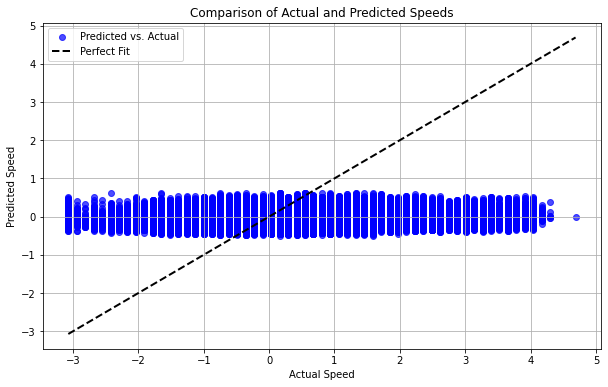

In [35]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted speeds
plt.figure(figsize=(10, 6))
plt.scatter(test['SPEED'], y_pred, alpha=0.7, color='blue', label='Predicted vs. Actual')
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Comparison of Actual and Predicted Speeds')
plt.plot([test['SPEED'].min(), test['SPEED'].max()],
         [test['SPEED'].min(), test['SPEED'].max()], 'k--', lw=2, label='Perfect Fit')
plt.legend()
plt.grid(True)
plt.show()

Backwards stepwise regression

In [25]:
out_model = [] #variables in our model
in_model = train_df_X.columns.tolist() #variables not in (outside) our model


print("We now begin stepwise regression")
while(True):
    print("current predictors being used:", in_model)
  
    print("Backward step")
    #Backward step
    remove_these = []
    X = train_df_X[in_model]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    for i in in_model:
        #print("Considering removing variable", i)
        #print("p-value of variable", i, "is", model.pvalues[i])
        if(model.pvalues[i] > alpha_r):
            print("With the new model, p-value found greater than alpha_r=", alpha_r)
            print("Remove variable", i, "with p-value", model.pvalues[i])
            remove_these.append(i)
    if(remove_these == []):
        print("No variables removed. All p-values remain statistically significant at value above alpha_r=", alpha_r)
        break
    for i in remove_these:
        out_model.append(i)
        in_model.remove(i)
print("Final set of predictors being used:", in_model)

We now begin stepwise regression
current predictors being used: ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'snowdepth', 'windgust', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'weekday', 'time_of_day', 'lat', 'long', 'is_clear', 'is_overcast', 'is_partcloud', 'is_rainovercase', 'is_snowovercast', 'is_snowrainovercast']
Backward step
With the new model, p-value found greater than alpha_r= 0.05
Remove variable dew with p-value 0.7083639120955633
With the new model, p-value found greater than alpha_r= 0.05
Remove variable cloudcover with p-value 0.43269145415520305
With the new model, p-value found greater than alpha_r= 0.05
Remove variable solarradiation with p-value 0.25425968402934607
With the new model, p-value found greater than alpha_r= 0.05
Remove variable solarenergy with p-value 0.24565717460539016
With the new model, p-value found greater than alpha_r= 0.05
Remove variable uvindex with p-value 0.12319067533906164
With the n

In [26]:
print(out_model)

['dew', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex', 'is_clear', 'is_overcast', 'is_partcloud', 'is_rainovercase', 'is_snowovercast', 'is_snowrainovercast', 'precip']


In [27]:
X = train_df_X[in_model]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     4961.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:25:20   Log-Likelihood:            -2.7554e+06
No. Observations:             1960836   AIC:                         5.511e+06
Df Residuals:                 1960824   BIC:                         5.511e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0001      0.001      0.204      0.839      -0.001       0.002
temp                -0.0423      0.006     -7.486      0.000      -0.053      -0.031
feelslike            0.0233      0.006      4.185      0.000       0.012       0.034
humidity             0.0292      0.001     23.011      0.000       0.027       0.032
snowdepth           -0.0119      0.001    -14.230      0.000      -0.014      -0.010
windgust            -0.0273      0.001    -24.731      0.000      -0.029      -0.025
sealevelpressure     0.0103      0.001     10.245      0.000       0.008       0.012
visibility           0.0292      0.001     31.248      0.000       0.027       0.031
weekday              0.0288      0.001     37.236      0.000       0.027       0.030
time_of_day         -0.0430      0.001    -57.444      0.000      -0.044      -0.042
lat                 -0.1369      0.001   -180.827      0.000      -0.138      -0.135
long                 0.0151      0.001     19.895      0.000       0.014       0.017
==============================================================================
Omnibus:                   489074.309   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1469483.629
Skew:                           1.294   Prob(JB):                         0.00
Kurtosis:                       6.359   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(train[in_model], train['SPEED'])

# Predict using the testing data
y_pred = model.predict(test[in_model])

mse = mean_squared_error(test['SPEED'], y_pred)
r2 = r2_score(test['SPEED'], y_pred)
print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

Mean Squared Error: 0.973518704557839
R-squared Value: 0.026546378556122185


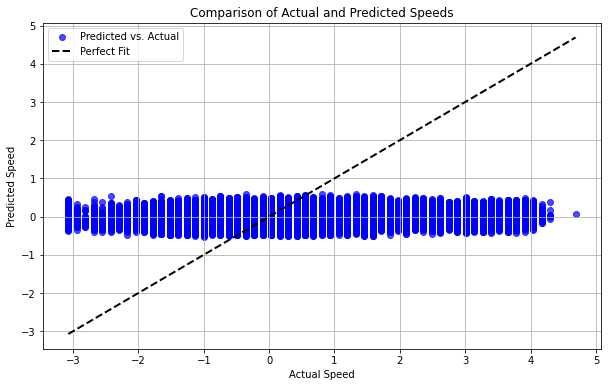

In [29]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted speeds
plt.figure(figsize=(10, 6))
plt.scatter(test['SPEED'], y_pred, alpha=0.7, color='blue', label='Predicted vs. Actual')
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Comparison of Actual and Predicted Speeds')
plt.plot([test['SPEED'].min(), test['SPEED'].max()],
         [test['SPEED'].min(), test['SPEED'].max()], 'k--', lw=2, label='Perfect Fit')
plt.legend()
plt.grid(True)
plt.show()

Stepwise Regression

In [36]:
in_model = [] #variables in our model
out_model = train_df_X.columns.tolist() #variables not in (outside) our model

#Initialization: find which value to begin with
print("Initialization phase: we first find the predictor with lowest p-value and insert into our model")
lowest_p = 1
new_param = ''
for i in out_model:
    X = train_df_X[[i]]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    if(model.pvalues[i] < lowest_p):
        lowest_p = model.pvalues[i]
        new_param = i
    #print(model.pvalues[i])
  #print(new_param, lowest_p)

in_model = [new_param]
out_model.remove(new_param)

print("We now begin stepwise regression")
while(True):
    print("current predictors being used:", in_model)
    #print(in_model)
    #print(out_model)

    print("Forward step")
    #Forward step
    lowest_p = 1
    new_param = ''
    for i in out_model:
        #print("Considering entering variable ", i)
        X = train_df_X[in_model + [i]]
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()
        #print(model.summary())
        #print("p-value of variable", i, "is", model.pvalues[i])
        if(model.pvalues[i] < lowest_p):
            lowest_p = model.pvalues[i]
            new_param = i
    print("Lowest p value found is from variable", new_param, "with value", lowest_p)
    if(lowest_p < alpha_e):
        print("this is lower than alpha_e=", alpha_e, "so we add it to our model")
        in_model.append(new_param)
        out_model.remove(new_param)
    else:
        print("This is higher than alpha_e=", alpha_e, "so we terminate procedure here")
        break


    print("Backward step")
    #Backward step
    remove_these = []
    X = train_df_X[in_model]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    for i in in_model:
        #print("Considering removing variable", i)
        #print("p-value of variable", i, "is", model.pvalues[i])
        if(model.pvalues[i] > alpha_r):
            print("With the new model, p-value found greater than alpha_r=", alpha_r)
            print("Remove variable", i, "with p-value", model.pvalues[i])
            remove_these.append(i)
    if(remove_these == []):
        print("No variables removed. All p-values remain statistically significant at value above alpha_r=", alpha_r)
    for i in remove_these:
        print(in_model, out_model)
        out_model.append(i)
        in_model.remove(i)

print("Final set of predictors being used:", in_model)

Initialization phase: we first find the predictor with lowest p-value and insert into our model
We now begin stepwise regression
current predictors being used: ['temp']
Forward step
Lowest p value found is from variable feelslike with value 0.0
this is lower than alpha_e= 0.05 so we add it to our model
Backward step
No variables removed. All p-values remain statistically significant at value above alpha_r= 0.05
current predictors being used: ['temp', 'feelslike']
Forward step
Lowest p value found is from variable cloudcover with value 0.0
this is lower than alpha_e= 0.05 so we add it to our model
Backward step
No variables removed. All p-values remain statistically significant at value above alpha_r= 0.05
current predictors being used: ['temp', 'feelslike', 'cloudcover']
Forward step
Lowest p value found is from variable solarradiation with value 0.0
this is lower than alpha_e= 0.05 so we add it to our model
Backward step
No variables removed. All p-values remain statistically signific

In [37]:
print(out_model)

['dew', 'solarenergy', 'uvindex', 'is_snowrainovercast', 'cloudcover']


In [38]:
X = train_df_X[in_model]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3336.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:36:28   Log-Likelihood:            -2.7527e+06
No. Observations:             1960836   AIC:                         5.505e+06
Df Residuals:                 1960817   BIC:                         5.506e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0001      0.001      0.198      0.843      -0.001       0.002
temp                -0.0256      0.006     -4.400      0.000      -0.037      -0.014
feelslike            0.0230      0.006      3.988      0.000       0.012       0.034
solarradiation      -0.0564      0.001    -59.891      0.000      -0.058      -0.055
weekday              0.0295      0.001     37.778      0.000       0.028       0.031
time_of_day         -0.0485      0.001    -62.367      0.000      -0.050      -0.047
lat                 -0.1364      0.001   -180.335      0.000      -0.138      -0.135
is_rainovercase     -0.0224      0.001    -16.479      0.000      -0.025      -0.020
long                 0.0154      0.001     20.361      0.000       0.014       0.017
visibility           0.0187      0.001     16.564      0.000       0.016       0.021
windgust            -0.0084      0.001     -7.300      0.000      -0.011      -0.006
is_overcast         -0.0074      0.002     -3.292      0.001      -0.012      -0.003
is_clear             0.0217      0.002     11.358      0.000       0.018       0.025
snowdepth           -0.0095      0.001    -10.129      0.000      -0.011      -0.008
sealevelpressure     0.0116      0.001     11.329      0.000       0.010       0.014
humidity             0.0121      0.001      8.632      0.000       0.009       0.015
is_snowovercast      0.0056      0.001      7.814      0.000       0.004       0.007
precip               0.0049      0.001      5.545      0.000       0.003       0.007
is_partcloud         0.0103      0.003      3.733      0.000       0.005       0.016
==============================================================================
Omnibus:                   495334.981   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1504745.586
Skew:                           1.307   Prob(JB):                         0.00
Kurtosis:                       6.404   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(train[in_model], train['SPEED'])

# Predict using the testing data
y_pred = model.predict(test[in_model])

mse = mean_squared_error(test['SPEED'], y_pred)
r2 = r2_score(test['SPEED'], y_pred)
print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

Mean Squared Error: 0.9710438256920944
R-squared Value: 0.029021091967600277


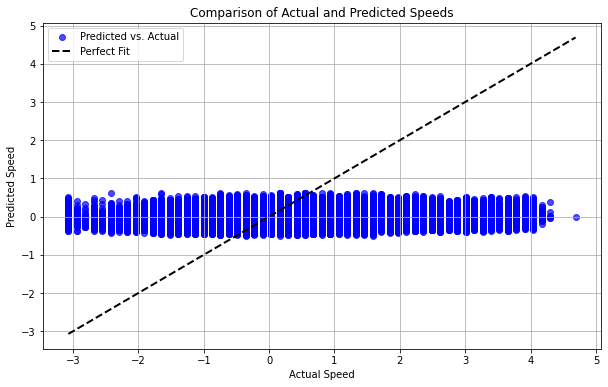

In [40]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted speeds
plt.figure(figsize=(10, 6))
plt.scatter(test['SPEED'], y_pred, alpha=0.7, color='blue', label='Predicted vs. Actual')
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Comparison of Actual and Predicted Speeds')
plt.plot([test['SPEED'].min(), test['SPEED'].max()],
         [test['SPEED'].min(), test['SPEED'].max()], 'k--', lw=2, label='Perfect Fit')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(train.drop(['SPEED'], axis=1), train['SPEED'])

# Predict using the testing data
y_pred = model.predict(test.drop(['SPEED'], axis=1))

mse = mean_squared_error(test['SPEED'], y_pred)
r2 = r2_score(test['SPEED'], y_pred)
print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

Mean Squared Error: 0.971038529664376
R-squared Value: 0.029026387641260754
